In [102]:
import pandas as pd


In [103]:
df = pd.read_csv("../data/clean/enph.csv", parse_dates=True, infer_datetime_format=True, index_col="date")
df.head()

,open,high,low,close,volume
date,,,,,
2012-03-30,7.50,8.24,7.0600,7.34,5048600.0
2012-04-02,7.65,8.20,7.4000,7.81,495500.0
2012-04-03,7.75,7.80,7.5000,7.64,316600.0
2012-04-04,7.77,7.77,7.3101,7.45,165100.0
2012-04-05,7.48,7.55,7.3700,7.43,104300.0


In [104]:
df.shape

(1916, 5)

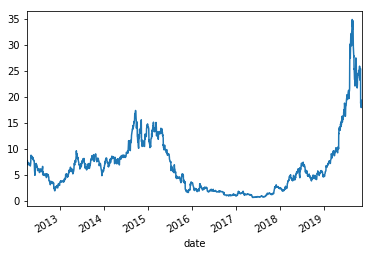

In [105]:
df.close.plot()

In [106]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

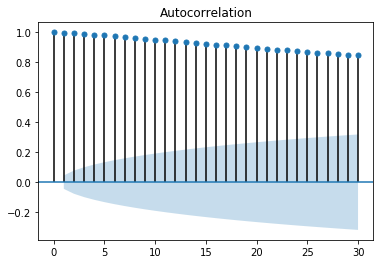

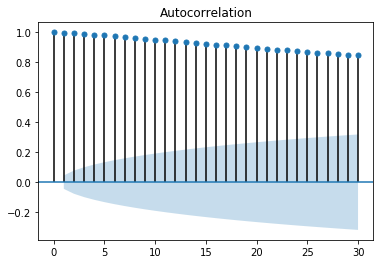

In [107]:
plot_acf(df.close, lags=30)

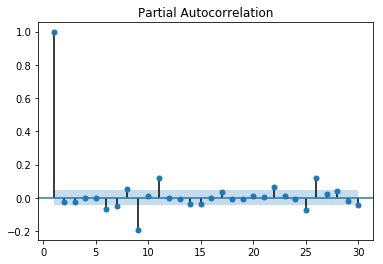

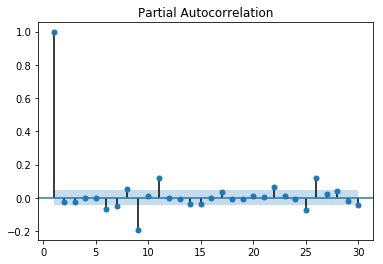

In [108]:
plot_pacf(df.close, lags=30, zero=False)

In [109]:
df=df.close

In [110]:
train_data = df.iloc[:round(df.shape[0]*0.8)]

In [111]:
test_data = df.iloc[round(df.shape[0]*0.8):]

In [112]:
train_data.shape[0] + test_data.shape[0] == df.shape[0]

True

In [113]:
from statsmodels.tsa.arima_model import ARIMA

In [114]:
model1 = ARIMA(train_data, order=(1,1,1))
results=model1.fit()
results.summary()

/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1532
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -375.145
Method:                       css-mle   S.D. of innovations              0.309
Date:                Sat, 09 Nov 2019   AIC                            758.291
Time:                        00:36:35   BIC                            779.628
Sample:                             1   HQIC                           766.231
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0019      0.008     -0.233      0.816      -0.017       0.014
ar.L1.D.close    -0.1756        nan        nan        nan         nan         nan
ma.L1.D.close     0.1849        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.6940           +0.0000j            5.6940            0.5000
MA.1           -5.4090           +0.0000j            5.4090            0.5000
-----------------------------------------------------------------------------
"""

In [115]:
# converts summary table into a dataframe, with position 3,3 and 4,3 being AIC and BIC, respectively
pd.read_html(results.summary().tables[0].as_html())[0]


,0,1,2,3
0,Dep. Variable:,D.close,No. Observations:,1532.000
1,Model:,"ARIMA(1, 1, 1)",Log Likelihood,-375.145
2,Method:,css-mle,S.D. of innovations,0.309
3,Date:,"Sat, 09 Nov 2019",AIC,758.291
4,Time:,00:36:35,BIC,779.628
5,Sample:,1,HQIC,766.231
6,NaN,NaN,NaN,NaN


In [116]:
model = ARIMA(train_data, order=(1,1,1))
results=model.fit()
BIC = pd.read_html(results.summary().tables[0].as_html())[0][3][4]


/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [117]:
bic_df = pd.DataFrame({
                "p":[],
                "q":[],
                "BIC":[]
            })

for p in range(1,10):
    for q in range(1,10):
        try:
            model = ARIMA(train_data, order=(p,1,q))
            results=model.fit()
            BIC = pd.read_html(results.summary().tables[0].as_html())[0][3][4]
            bic_df = bic_df.append([{
                "p":p,
                "q":q,
                "BIC":BIC
            }])
        except:
            print(f"except on {p},{q}")

/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  '

except on 1,2
except on 1,3
except on 1,4
except on 1,5


/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associ

except on 1,6
except on 1,7


/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associ

except on 2,3
except on 2,4
except on 2,5
except on 2,6
except on 2,7


/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associ

except on 2,8


/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associ

except on 3,3
except on 3,4
except on 3,5
except on 3,6
except on 3,7


/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associ

except on 3,8
except on 3,9


/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associ

except on 4,4
except on 4,5
except on 4,6


/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associ

except on 4,7
except on 4,8
except on 4,9


/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associ

except on 5,5
except on 5,6
except on 5,7
except on 5,8
except on 5,9


/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associ

except on 6,6
except on 6,7
except on 6,8
except on 6,9


/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associ

except on 7,7
except on 7,8
except on 7,9


/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associ

except on 8,8
except on 8,9


/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associ

In [118]:
bic_df

,p,q,BIC
0,1.0,1.0,779.628
0,1.0,8.0,810.717
0,1.0,9.0,816.175
0,2.0,1.0,786.810
0,2.0,2.0,769.935
0,2.0,9.0,810.007
0,3.0,1.0,793.997
0,3.0,2.0,801.252
0,4.0,1.0,799.427
0,4.0,2.0,780.778


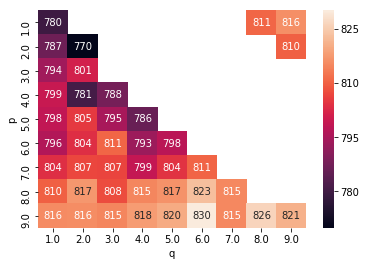

In [119]:
import seaborn as sns
sns.heatmap(bic_df.pivot("p","q","BIC"), annot=True, fmt=".0f")

it appears that p,q = 2,2 gives the best BIC score, so that's what I'll use for my model.

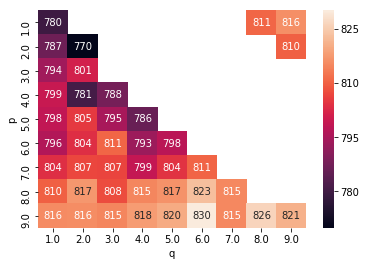

In [125]:
sns.heatmap(bic_df.pivot("p","q","BIC"), annot=True, fmt=".0f").get_figure().savefig("arima_bic_heatmap.svg")

In [175]:
model = ARIMA(train_data, order=(2,1,2))
results=model.fit()
results.summary()

/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/camkirk/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1532
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -362.965
Method:                       css-mle   S.D. of innovations              0.307
Date:                Sat, 09 Nov 2019   AIC                            737.930
Time:                        01:43:04   BIC                            769.935
Sample:                             1   HQIC                           749.840
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0019      0.008     -0.240      0.810      -0.017       0.013
ar.L1.D.close    -1.2942      0.009   -143.926      0.000      -1.312      -1.277
ar.L2.D.close    -0.9830      0.009   -105.139      0.000      -1.001      -0.965
ma.L1.D.close     1.2725      0.010    123.823      0.000       1.252       1.293
ma.L2.D.close     0.9762      0.012     79.817      0.000       0.952       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6583           -0.7642j            1.0086           -0.3632
AR.2           -0.6583           +0.7642j            1.0086            0.3632
MA.1           -0.6517           -0.7743j            1.0121           -0.3614
MA.2           -0.6517           +0.7743j            1.0121            0.3614
-----------------------------------------------------------------------------
"""

In [121]:
bic_df.to_csv("./bic_calc_results.csv")

In [129]:
# bic_df.read_csv("./bic_calc_results.csv").head()

In [136]:
arima_forecast = pd.Series(results.forecast(steps=test_data.shape[0])[0])

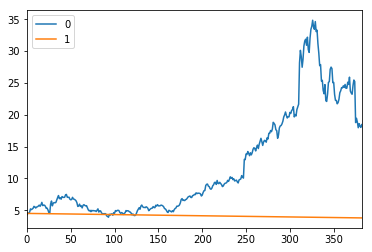

In [141]:
arima_forecast_plot = pd.DataFrame([test_data.values,arima_forecast]).T.plot().get_figure()

In [142]:
arima_forecast_plot.savefig("./arima_forecast_plot.svg")

YIKES. Because this wasn't stationary, the model misses the mark by a LOT. For the sake of the class demo i'll keep fording ahead, but in a real analysis i'd stop and either a) stationarize the data to fix it for this model, b) use a different model.

In [176]:
results.save("./models/arima_results.pickle")

## GARCH Model

In [147]:
from statsmodels.tsa.stattools import adfuller

In [149]:
adfuller(train_data)[1]

0.6104734175560593

adfuller test results fails the test, thus i fail to reject the null hypothesis that the data is not stationary, and thus needs to have a stationarization method applied to it.

In [150]:
returns=train_data.pct_change()

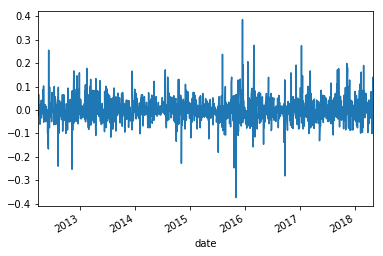

In [151]:
returns.plot()

In [155]:
from arch import arch_model

we can cut our search space now that we know that 2,2 works pretty well for arima

In [160]:
bic_df = bic_df.append([{
                "p":[],
                "q":[],
                "BIC":[]
            }])

for p in range(1,3):
    for q in range(1,3):
        try:
            print(f"starting {p},{q}")
            model = arch_model(returns, mean="Zero", vol="GARCH", p=p, q=q)
            results = model.fit(disp="off") # note that we are re-using model and results here, which is why it is so important to split files
            BIC = pd.read_html(results.summary().tables[0].as_html())[0][3][4]
            bic_df = bic_df.append([{
                    "p":p,
                    "q":q,
                    "BIC":BIC
                }])
        except:
            print(f"except {p},{q}")

starting 1,1
except 1,1
starting 1,2
except 1,2
starting 2,1
except 2,1
starting 2,2
except 2,2


still taking way too long to train, will come back to this some other time

In [ ]:
bic_df.head()

In [ ]:
bic_df.to_csv("./garch_bic_calc_results.csv")

In [ ]:
sns.heatmap(bic_df.pivot("p","q","BIC"), annot=True, fmt=".0f")

In [ ]:
sns.heatmap(bic_df.pivot("p","q","BIC"), annot=True, fmt=".0f").get_figure().savefig("garch_bic_heatmap.svg")

In [ ]:
model = arch_model(returns, mean="Zero", vol="GARCH", p=1, q=1)
results = model.fit(disp="off")
results.save("./models/garch.pickle")

## finding last day of training

In [172]:
df.tail()


date
2019-11-04    17.95
2019-11-05    18.59
2019-11-06    18.20
2019-11-07    18.00
2019-11-08    18.44
Name: close, dtype: float64

In [173]:
from datetime import datetime

In [174]:
datetime.now()

datetime.datetime(2019, 11, 9, 1, 40, 18, 893865)

In [ ]:
pandas.timeDelta()

In [180]:

pd.core.series.Series

pandas.core.series.Series